#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install torch torchvision
!pip install wandb
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install dotmap
!pip install dlib
!pip install face-recognition
!pip install face-recognition-models

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision import transforms, datasets
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms import Compose
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [43]:
from torchvision.transforms.transforms import CenterCrop
from torchvision.transforms.transforms import Resize

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomResizedCrop(112),
    transforms.ToTensor()
])

In [6]:
# 1. prepare data
from os import chdir as cd

cd('/content/drive/MyDrive/detect_mask/MaskTheFace')
! python mask_the_face.py --path '/content/drive/MyDrive/detect_mask/celeb/celeb_not_masked' --mask_type "random"

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
 76% 19/25 [00:14<00:03,  1.54it/s]Please input image file. png / jpg
 84% 21/25 [00:30<00:05,  1.45s/it]
Traceback (most recent call last):
  File "/content/drive/MyDrive/detect_mask/MaskTheFace/mask_the_face.py", line 150, in <module>
    cv2.imwrite(w_path, img)
cv2.error: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:696: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'



In [27]:
# 2. Load the model
from PIL import Image
import matplotlib.pyplot as plt

model = models.resnet50()
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/detect_mask/model.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Not Wearing Mask (5.655057861986279e-07)


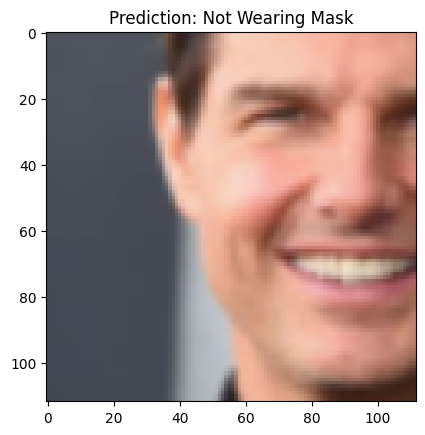

In [47]:
## 3. perform evaluation

# Load and preprocess the test image
test_image = Image.open("/content/drive/MyDrive/detect_mask/celeb/celeb_not_masked/002_6749a2c4.jpg")
test_image = transform(test_image).unsqueeze(0)

# Make a prediction
with torch.no_grad():
    output = model(test_image)
    prediction = torch.sigmoid(output).item()

if prediction > 0.5:
    print("Wearing Mask (" + f"{prediction}" + ")")
else:
    print("Not Wearing Mask (" + f"{prediction}" + ")")

# Visualize the test image
plt.imshow(test_image.squeeze().permute(1, 2, 0))
plt.title("Prediction: " + ("Wearing Mask" if prediction > 0.5 else "Not Wearing Mask"))
plt.show()
